In [1]:
  !curl -s https://course.fast.ai/setup/colab 

#!/bin/bash
if [ ! -e /content/models ]; then
        mkdir -p /root/.torch/models
        mkdir -p /root/.fastai/data
        ln -s /root/.torch/models /content
        ln -s /root/.fastai/data /content
        rm -rf /content/sample_data/
fi

echo Updating fastai...
pip install fastai --upgrade > /dev/null

echo Done.


In [2]:
import fastai
from fastai import *
from fastai.vision import *
import pathlib


In [3]:
path = pathlib.PurePosixPath('C:\\Users\\SIDDHARTH\\Downloads\\asl')
learn = load_learner(path)


In [7]:
learn.predict??

In [4]:
!pip install torch==1.4.0 torchvision==0.5.0

In [15]:
path = pathlib.PurePosixPath('C:\\Users\\SIDDHARTH\\Downloads\\asl')
path

PurePosixPath('C:\\Users\\SIDDHARTH\\Downloads\\asl')

In [16]:
data = ImageDataBunch.from_folder(path=path,ds_tfms=get_transforms(),size=224,valid_pct=0.3)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (60920 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
asl_alphabet_test,asl_alphabet_test,asl_alphabet_test,asl_alphabet_test,asl_alphabet_test
Path: C:\Users\SIDDHARTH\Downloads\asl;

Valid: LabelList (26108 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
del,C,Q,M,Z
Path: C:\Users\SIDDHARTH\Downloads\asl;

Test: None

In [17]:
print(data.classes)
data.c

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'asl_alphabet_test', 'del', 'nothing', 'space']


30

In [18]:
data.showbatch()

AttributeError: showbatch

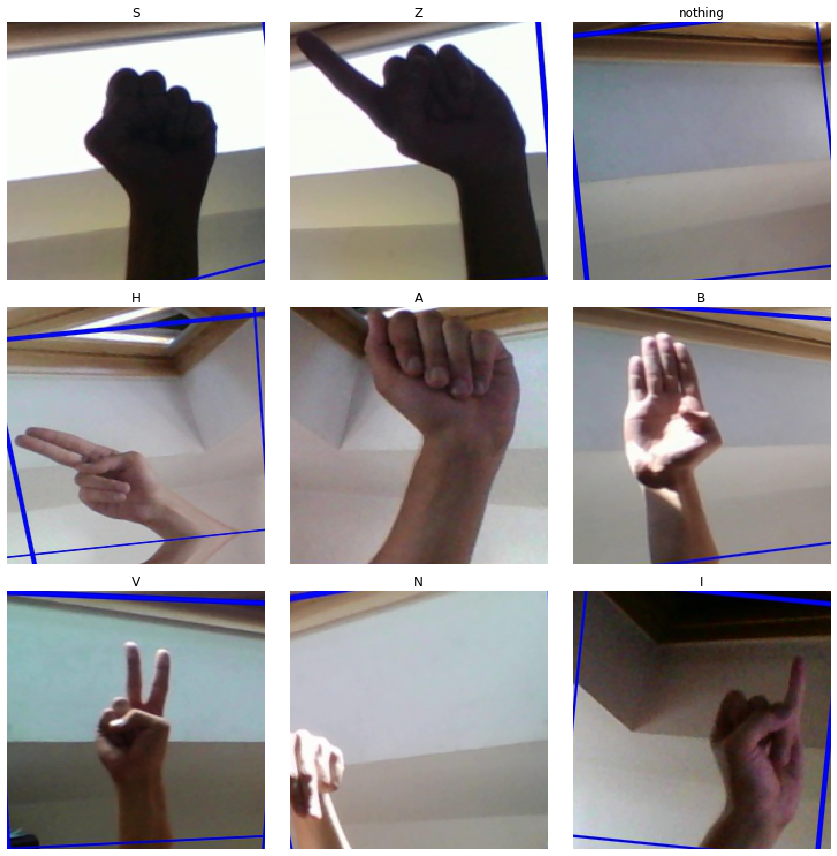

In [19]:
data.show_batch(rows=3)

In [21]:
learn = cnn_learner(data,models.resnet34,metrics=accuracy)

In [22]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.210116,0.053652,0.983492,20:27
1,0.083434,0.023328,0.994561,16:35
2,0.026054,0.009772,0.999119,16:29
3,0.021685,0.009114,0.999196,16:23


In [25]:
learn.save('stage-1')

In [27]:
interp = ClassificationInterpretation.from_learner(learn)


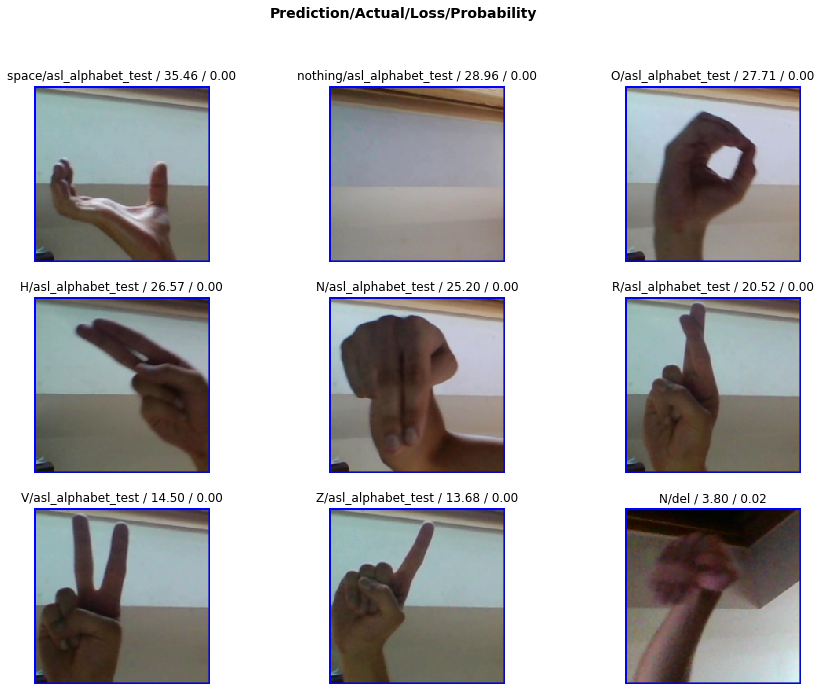

In [28]:
interp.plot_top_losses(9,figsize=(15,11))

In [1]:
learn.load('stage-1')

NameError: name 'learn' is not defined

In [4]:
!pip install opencv-python

In [7]:
import cv2
# import os
# from fastai.vision import *


import subprocess

def doThis(pred):
    if pred.obj == 'V':
        subprocess.call(["C:\\Program Files (x86)\\Steam\\steam.exe"])
    # elif pred == 'W':
        #todo
    # elif pred == 'A':
        #todo
        
cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")


while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    

    c = cv2.waitKey(3000)
    if c == 27:
        break
    # path = os.path.dirname(os.path.abspath(__file__))
    # learn = load_learner(path)
    cv2.imwrite('test1.jpg',frame)
    img = open_image('./test1.jpg')
    pred_class,index,prob = learn.predict(img)
    # print(pred_class, prob)
    #cv2.putText(frame, "Prob = {0:.4f}".format(torch.max(prob).item()), (380, 50),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 255), 2)
    print(pred_class)
    print(torch.max(prob).item())
    cv2.imshow('Input', frame)
    if torch.max(prob).item() > 0.9:  
          doThis(pred_class)


cap.release()
cv2.destroyAllWindows()



O
0.365755558013916
M
0.17734751105308533
X
0.45414820313453674
V
0.48189491033554077
V
0.9637343883514404
M
0.7489744424819946
M
0.29600536823272705


In [14]:
image=open_image('C:\\Users\\SIDDHARTH\\Downloads\\asl\\asl_alphabet_test\\asl_alphabet_test\\W_test.jpg')
pred_class,index,prob = learn.predict(image)
print(pred_class)
print(torch.max(prob).item())

W
0.9999593496322632


In [15]:
image=open_image('C:\\Users\\SIDDHARTH\\Downloads\\asl\\asl_alphabet_test\\asl_alphabet_test\\1.jpg')
pred_class,index,prob = learn.predict(image)
print(pred_class)
print(torch.max(prob).item())

W
0.9810644388198853
